# Assignment 1

In [25]:
# Import relevant libraries
import os
import sys
print('Python: {}'.format(sys.version))

import scipy
print('scipy: {}'.format(scipy.__version__))

import numpy
print('numpy: {}'.format(numpy.__version__))

import pandas as pd
print('pandas: {}'.format(pd.__version__))

import sklearn
print('sklearn: {}'.format(sklearn.__version__))

print("Hello World!")

Python: 3.8.8 (default, Feb 24 2021, 15:54:32) [MSC v.1928 64 bit (AMD64)]
scipy: 1.7.1
numpy: 1.19.2
pandas: 1.1.3
sklearn: 0.24.2
Hello World!


In [26]:
#Function to load the data
def loadData(path,filename):
    try:
             files = os.listdir(path)
             for f in files:
                 if f == filename:
                     data = pd.read_csv(os.path.join(path,f))
                     return data
            
    except Exception as ex:
           print ("-----------------------------------------------------------------------")
           template = "An exception of type {0} occurred. Arguments:\n{1!r}"
           message = template.format(type(ex).__name__, ex.args)
           print (message)

In [27]:
# Read the file
path = r'C:\Users\pmspr\Documents\HS\MS\Sem 6\EECS 658\Data'
filename = "iris.csv"
data = loadData(path,filename)
display(data)

X = data
y = data.pop('class')

# Encode the label
#from sklearn import preprocessing
#le = preprocessing.LabelEncoder()
#le.fit(y)

#print('Classes of the label:')
#print(le.classes_)

#y = list(le.transform(y))

sepal-length  sepal-width  petal-length  petal-width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]

In [28]:
# Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
print('Number of Training samples:{}'.format(len(X_train)))
print('Number of Test samples:{}'.format(len(X_test)))

Number of Training samples:75
Number of Test samples:75


In [29]:
# Train the model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
clf = gnb.fit(X_train, y_train)

# Predict the test data
y_pred = clf.predict(X_test)
#y_pred = list(le.inverse_transform(y_pred))

# Create a local csv
#pd.DataFrame([list(y_test_en),list(y_pred_en)],index=['actual','pred']).T.to_csv('test.csv',index=False)
pd.DataFrame({'actual' : y_test,'pred' : y_pred}).to_csv('test.csv',index=False)

Number of mislabeled points out of a total 75 points : 3
Accuracy of the NB model: 0.960000
Precision score of the NB model [1.         0.95652174 0.92857143]
Recall score of the NB model [1.         0.91666667 0.96296296]
F1 score of the NB model [1.         0.93617021 0.94545455]

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        24
Iris-versicolor       0.96      0.92      0.94        24
 Iris-virginica       0.93      0.96      0.95        27

       accuracy                           0.96        75
      macro avg       0.96      0.96      0.96        75
   weighted avg       0.96      0.96      0.96        75



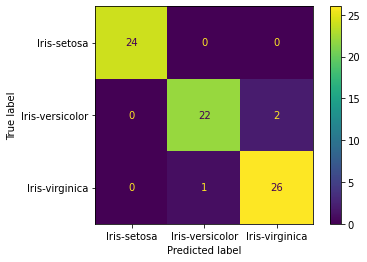

In [30]:
# Deduce the metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,ConfusionMatrixDisplay, classification_report

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

acc = accuracy_score(y_test, y_pred)
print('Accuracy of the NB model: {:f}'.format(acc))

precision = precision_score(y_test, y_pred,average=None)
print('Precision score of the NB model {}'.format(precision))

recall = recall_score(y_test, y_pred,average=None)
print('Recall score of the NB model {}'.format(recall))

f1 = f1_score(y_test, y_pred,average=None)
print('F1 score of the NB model {}'.format(f1))

cm=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
_=disp.plot() 
print()
print(classification_report(y_test,y_pred))